In [10]:
import os
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data_path = '../data/raw/users_behavior.csv'
df = pd.read_csv(data_path)

In [7]:
# Display basic information about the DataFrame
print()
print("DataFrame Information:")
print()
print(df.info())
print()
print("\nDataFrame Description:")
print()
print(df.describe(include='all'))
print()
print("\nFirst 5 rows of the DataFrame:")
print()
print(df.head())


DataFrame Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None


DataFrame Description:

             calls      minutes     messages       mb_used     is_ultra
count  3214.000000  3214.000000  3214.000000   3214.000000  3214.000000
mean     63.038892   438.208787    38.281269  17207.673836     0.306472
std      33.236368   234.569872    36.148326   7570.968246     0.461100
min       0.000000     0.000000     0.000000      0.000000     0.000000
25%      40.000000   274.575000     9.000000  12491.902500     0.000000
50%      62.000000   430.600000    30.000000  16943.235000     0.000000
75%      

# Structure Analysis

- 3,214 rows, 5 columns;
- No columns with NaN values;
- All columns seemns to have clear predictive value;
- is_ultra is the target variable.


Value counts for 'is_ultra':

is_ultra
0    2229
1     985
Name: count, dtype: int64


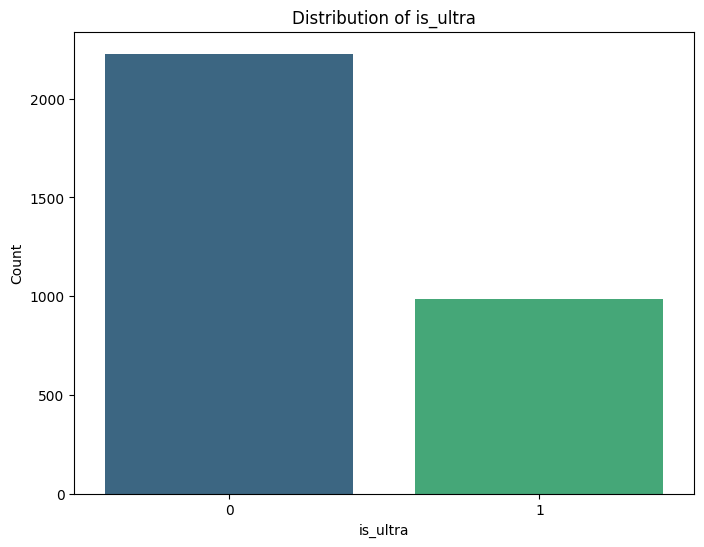

In [12]:
#is_ultra variable analysis
print("\nValue counts for 'is_ultra':")
print()
print(df['is_ultra'].value_counts())
# Plotting the distribution of 'is_ultra'
plt.figure(figsize=(8, 6))
sns.countplot(x='is_ultra', data=df, palette='viridis')
plt.title('Distribution of is_ultra')   
plt.xlabel('is_ultra')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('../reports/fig_dist_isultra.png', bbox_inches='tight')
plt.show()

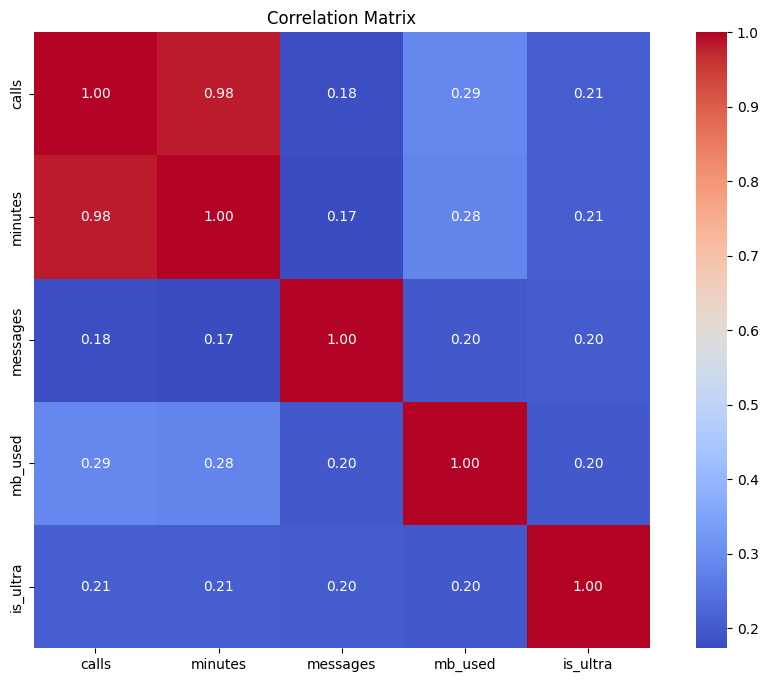

In [13]:
#Correlation analysis
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.savefig('../reports/fig_correlation_matrix_eda.png', bbox_inches='tight')
plt.show()

# Final Analysis Before Feature Engineering

- The target variable is_ultra is unbalanced: approximately 69% of customers use the Smart plan (0) and 31% use the Ultra plan (1). Therefore, metrics such as F1-score and AUC-ROC are more appropriate than accuracy alone to evaluate the models.
- Correlation analysis shows that: calls and minutes have a very high correlation with each other (0.98), indicating redundancy—one of them can possibly be discarded. Because minutes indicates "time quantity" the column is more informative than calls and will remain. 
- None of the variables have a strong correlation with the target variable is_ultra, with all values ​​close to 0.20. This suggests that variable combinations or feature engineering can help increase predictive power.
- All numerical variables have variance, so they can be retained for further analysis. However, scaling will be necessary if distance-based models (such as SVM or KNN) are used.
- There are no missing values ​​in the raw data. The next step is to think of useful combinations or transformations, such as monthly data usage, total usage in minutes, or creating consumption bands.

In [15]:
df.drop(columns=['calls'], inplace=True)  # Dropping 'calls' due to high correlation with 'minutes'
os.makedirs('../data/interim', exist_ok=True)
output_path = '../data/interim/users_behavior_cleaned.csv'
df.to_csv(output_path, index=False)
print(f"Arquivo salvo com sucesso em: {output_path}")

KeyError: "['calls'] not found in axis"